In [1]:
!pip install gdown
!pip install nltk
!pip install transformers
!pip install transformers datasets
!pip install transformers datasets accelerate -U



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 8.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_

In [2]:
import gdown

# Replace 'FILE_ID' with your file ID and 'output.csv' with the desired output file name
gdown.download('https://drive.google.com/uc?id=1dhFItsdD4mTsq26Ano45I-mKfv4u6SV7', 'output.csv', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1dhFItsdD4mTsq26Ano45I-mKfv4u6SV7
To: /content/output.csv
100%|██████████| 97.5M/97.5M [00:01<00:00, 55.8MB/s]


'output.csv'

In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('output.csv')

# Display the DataFrame
print(df.head)
df.describe()


<bound method NDFrame.head of                                                      text  label
0       ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...      1
1       أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...      1
2       هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...      1
3       خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...      1
4       ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...      1
...                                                   ...    ...
164769  وهلأ لوين؟ ....سؤال اتمنى أن أطرحه في مصر اعتق...      1
164770  قراصنة الكاريبي بحس أنثوي ثلاثي الأبعاد بعد غي...      1
164771  قصة بسيطة ودراما واقعية إسلوب إخراجي يتسم بالح...      0
164772  بزوغ الفجر بتتويج دموي هكذا طل علينا فيلم ملحم...      1
164773  غزل البنات وأجمل معاني الحب عفوية وبساطة أجدها...      1

[164774 rows x 2 columns]>


,label
count,164774.000000
mean,0.213547
std,0.822813
min,-1.000000
25%,-1.000000
50%,0.000000
75%,1.000000
max,1.000000


# data processing

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.2, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.125, random_state = 0)


In [5]:
x_train

49196     كتاب خفيف جدا ، تقريبا خلصته في ساعة أثناء أنق...
33111     رواية راااااءعة، الكثير من التفاصيل الدقيقة و ...
138319     كتابات ساخره بعضها واقعى للغايه حتى انك لتفكر...
26521     من روآئع إحسان عبد القدوس. عبرة وجمآل. أنصح ال...
20495                     رائع. . دخول خدمه الغرف وانت نايم
                                ...                        
136775     كتيّب يحمل مجموعة صغيرة من مقالات الدكتور غاز...
143526                                                    ق
120701     رواية رائعة ، تفاصيلها مدهشة و ممتعة و صادقة ...
81748     مما لاشك فيه أن محمد يملك قدرة هائلة في وصف عش...
64706     الأبطال جعلوني أكره الرواية ضعف.. زيف.. كذب.. ...
Name: text, Length: 115341, dtype: object

In [6]:
from transformers import Trainer
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments
import pandas as pd

# Load the tokenizer and model
model_name = 'CAMeL-Lab/bert-base-arabic-camelbert-mix-sentiment'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/842 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [7]:
from torch.utils.data import Dataset

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        item = {key: val.squeeze() for key, val in encoding.items()}
        item['labels'] = torch.tensor(label, dtype=torch.long)
        return item

# Map labels to the range [0, num_labels-1]
label_mapping = {0: 0, 1: 1, -1: 2}
y_train = y_train.map(label_mapping).tolist()
y_val = y_val.map(label_mapping).tolist()
y_test = y_test.map(label_mapping).tolist()

train_dataset = SentimentDataset(x_train.tolist(), y_train, tokenizer)
val_dataset = SentimentDataset(x_val.tolist(), y_val, tokenizer)
test_dataset = SentimentDataset(x_test.tolist(), y_test, tokenizer)


# fine tuning

In [9]:
import torch
import numpy as np
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, predictions)
    return {'accuracy': acc}

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',         # Directory to save the final model
    num_train_epochs=2,             # Number of training epochs
    per_device_train_batch_size=40, # Batch size for training
    per_device_eval_batch_size=40,  # Batch size for evaluation
    warmup_steps=500,               # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,              # Strength of weight decay
    logging_dir='./logs',           # Directory to save logs
    logging_steps=50,               # Log every 10 steps
    eval_strategy="epoch",          # Evaluate the model at the end of each epoch
    save_strategy="epoch",          # Save checkpoint at the end of each epoch
    save_total_limit=1,             # Limit the total number of checkpoints saved. Only the last 1 will be kept.
    load_best_model_at_end=True,    # Load the best model when finished training (according to the validation loss)
    metric_for_best_model="accuracy" # Specify the evaluation metric to use for comparing checkpoints
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,  # Optionally, you can add a validation dataset
    compute_metrics=compute_metrics  # Add the custom metrics function
)

# Train the model
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy
1,0.604700,0.611982,0.739228
2,0.450900,0.616011,0.746753


TrainOutput(global_step=5768, training_loss=0.5747520635924954, metrics={'train_runtime': 4716.7739, 'train_samples_per_second': 48.907, 'train_steps_per_second': 1.223, 'total_flos': 1.5173882357082624e+16, 'train_loss': 0.5747520635924954, 'epoch': 2.0})

In [10]:
# Predict on test data
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
accuracy = (predicted_labels == y_test).mean()
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7483234714003945


In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Compute classification report
report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(report)

# Compute accuracy
accuracy = (predicted_labels == y_test).mean()
print("Test Accuracy:", accuracy)

Confusion Matrix:
[[ 5145  2668  1364]
 [ 1744 13272   373]
 [ 1476   669  6244]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59      9177
           1       0.80      0.86      0.83     15389
           2       0.78      0.74      0.76      8389

    accuracy                           0.75     32955
   macro avg       0.73      0.72      0.73     32955
weighted avg       0.74      0.75      0.74     32955

Test Accuracy: 0.7483234714003945


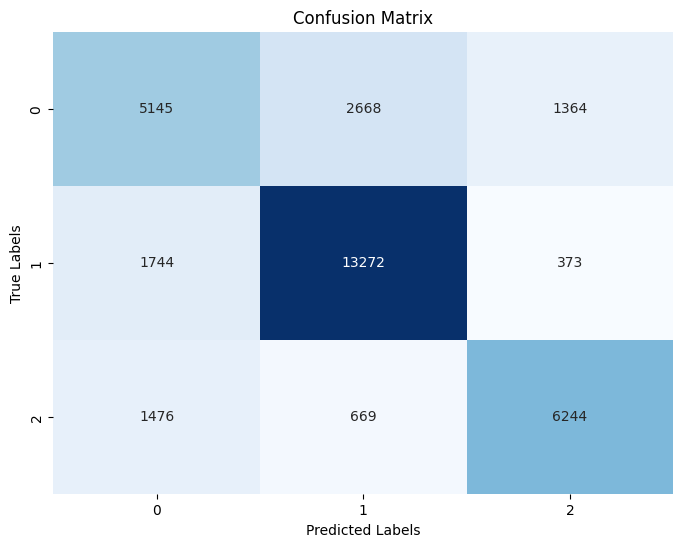

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [13]:
# Save the trained model
model.save_pretrained("./camelbert_model_all_data")


In [14]:
import pickle

# Save the model as a pickle file
with open('camelbert_model_all_data.pkl', 'wb') as f:
    pickle.dump(model, f)
